# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [70]:
import os
import cv2
import numpy as np
import pandas as pd
from collections import Counter


from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

In [64]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

100%|██████████| 612M/612M [00:08<00:00, 74.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1


Path to dataset files: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1


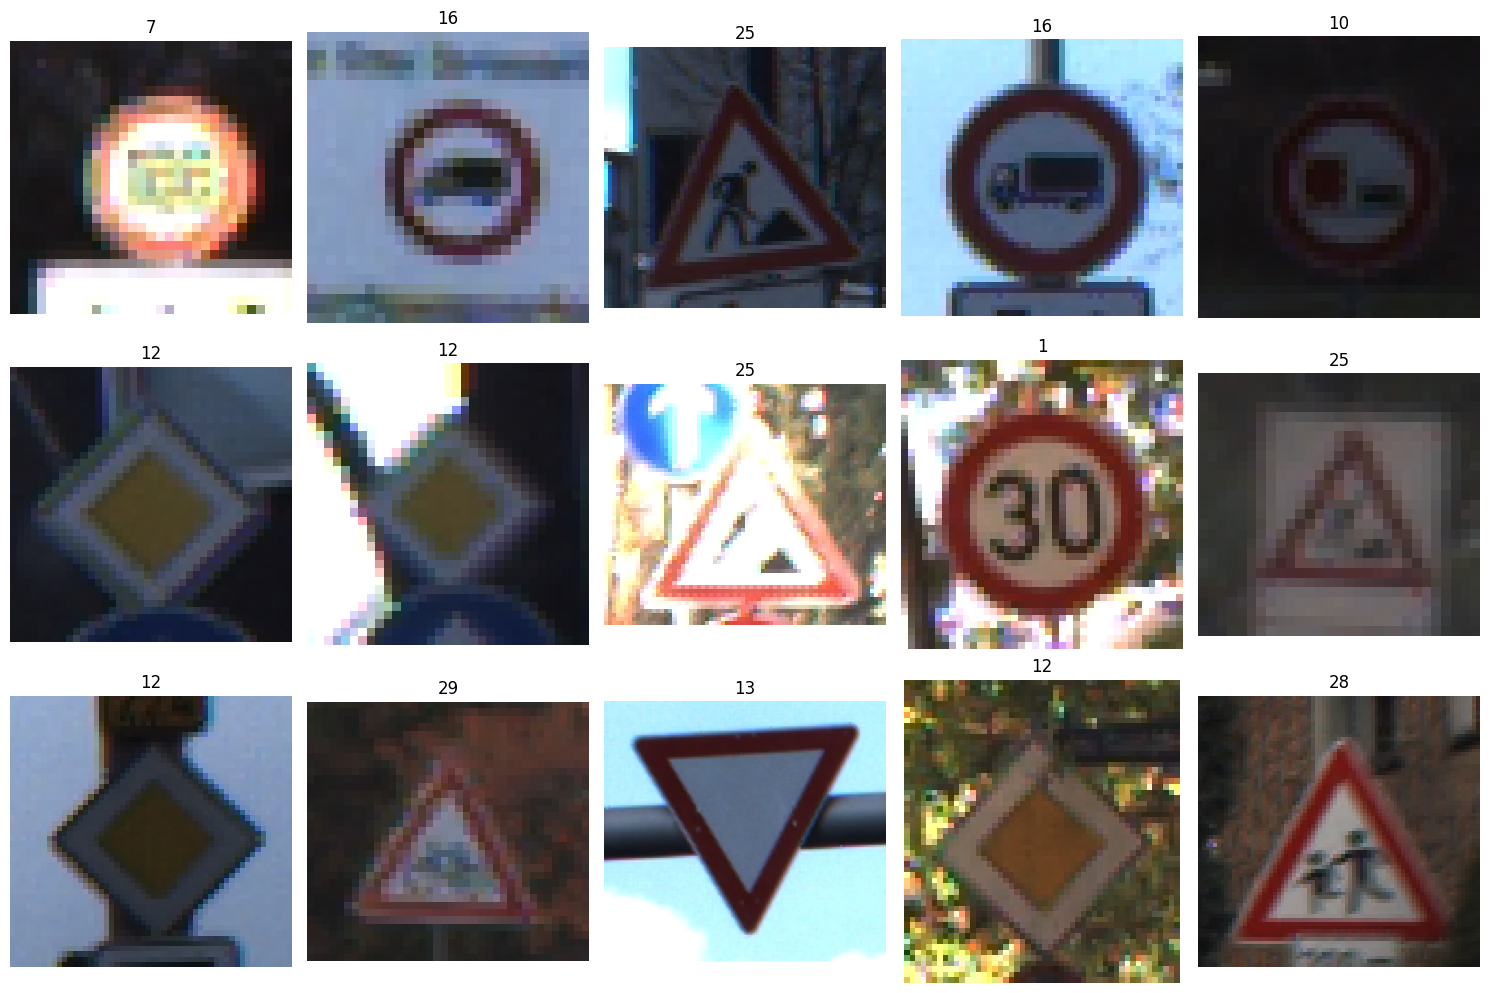

In [67]:
# Path to the Train.csv file
csv_path = os.path.join(path, "Train.csv")

# Load the training labels
data = pd.read_csv(csv_path)

# Number of training samples
num_samples = len(data)
plt.figure(figsize=(15, 10))

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    img_path = os.path.join(path, data.iloc[idx]['Path'])  # Full path to the image
    img = cv2.imread(img_path)
       # Convert the image to RGB format
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.subplot(3, 5, ii + 1)
    plt.imshow(img)
    plt.title(data.iloc[idx]['ClassId'])
    plt.axis('off')

plt.tight_layout()
plt.show()


### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

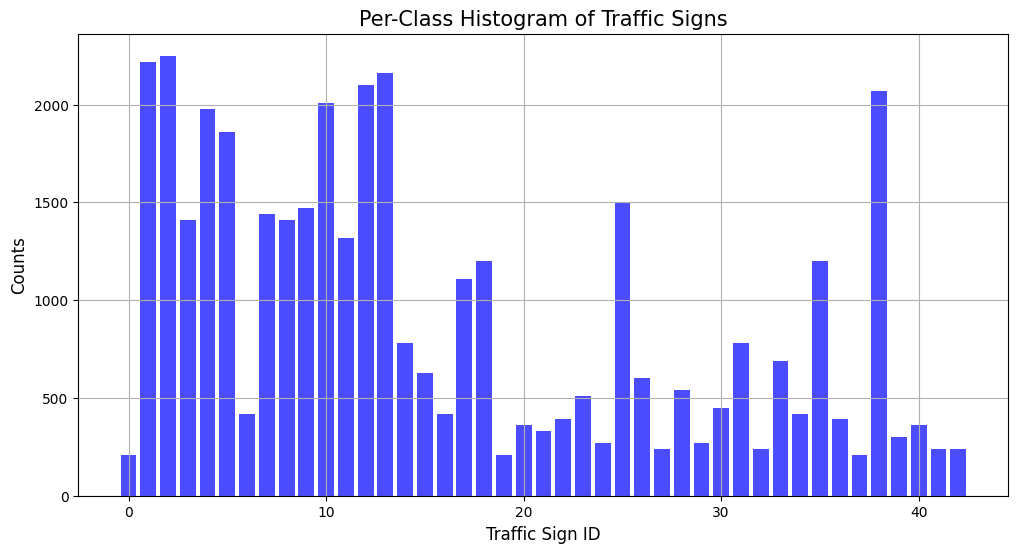

In [71]:
# Extract class identifiers
# Hint: Check the csv
ids = data['ClassId']

# Compute the histogram
hist = Counter(ids)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.bar(hist.keys(), hist.values(), color='blue', alpha=0.7)
plt.xlabel('Traffic Sign ID', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Per-Class Histogram of Traffic Signs', fontsize=15)
plt.grid(True)
plt.show()

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

In [ ]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?

Not really - it is clearly visible from the histogram that some calasses have a lot of examples and some have only few.

* Are there any classes that are (significantly) over-represented or under-represeneted?

1,2,13 are over-represented and 0, 29, 27 are under-represeneted.

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?